## **Linear Algebra**

In [15]:
import numpy as np
import matplotlib.pyplot as plt


In [16]:
array = np.random.rand(3, 3)
print(array) # this is a 3*3 numpy array

mult = array * array # This is a element wise multiplication not matrix multiplication
print(mult)

[[0.85154538 0.66045178 0.27774293]
 [0.17794542 0.95512721 0.82152706]
 [0.70393284 0.74213543 0.70844603]]
[[0.72512954 0.43619656 0.07714114]
 [0.03166457 0.91226799 0.67490671]
 [0.49552145 0.550765   0.50189578]]


In [17]:
matrix_mult = np.dot(array, array) # this is a vector multiplication or matrix multiplication
print(matrix_mult)

[[1.03816628 1.39934301 0.9758556 ]
 [0.89978899 1.63947669 1.41609351]
 [1.23018879 1.69951034 1.30709248]]


In [18]:
mat = np.random.rand(3, 3)
vect = np.random.rand(3)

print(np.dot(mat, vect)) # matrix * vector = matrix
print(np.dot(vect, vect)) # vector dot product ->

print(mat * vect)

[0.69282289 0.74847378 0.37401395]
0.6273470510177309
[[0.07218539 0.47648756 0.14414994]
 [0.03616844 0.59972659 0.11257875]
 [0.01339178 0.26651338 0.09410879]]


Numpy has in-built <code>matrix class</code> to perform matrix operations.
<br>
**Slower than Numpy Arrays**

In [22]:
matrix = np.matrix(mat)
vector = np.matrix(vect).T # column vextor

In [23]:
# Now the product operation behaves as matrix product
print(matrix*matrix)

[[0.89672802 1.22163232 1.2994605 ]
 [0.65577964 1.05814667 1.03287815]
 [0.30258602 0.5333287  0.55118475]]


In [24]:
print(matrix * vector)

[[0.69282289]
 [0.74847378]
 [0.37401395]]


In [25]:
print(vector.T * matrix) # since vector is also a matrix for valid multiplication must be transposed first

[[0.38421274 0.72704837 0.61494195]]


**Advanced Linear Algebra Operations**<br>
Library: <code>linalg</code>
<br>
* `linalg.det(A)`
* `linalg.inv(A)`
* `linalg.eig, linalg.eigvals, linalg.eigh`
* `linalg.svd()`
* `linalg.solve()`
* `linagl.cholesky()`

In [29]:
from numpy import linalg

In [32]:
mat_a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 10]])
mat_b = np.array([1, 2, 3])
solution = linalg.solve(mat_a, mat_b) # mat_a* X = mat_b -> solves for X
print(solution)
# To check if right
print(np.dot(mat_a, solution) - mat_b)

[-0.33333333  0.66666667 -0.        ]
[ 0.00000000e+00 -2.22044605e-16  0.00000000e+00]


In [35]:
print(np.sum(mat_a)) # sum of elements
print(np.cumsum(mat_a)) # cumulative sum
print(np.trace(mat_a)) # trace of matrix
print(np.diag(mat_a)) # diagonal of a matrix
print(np.sum(np.diag(mat_a)))

46
[ 1  3  6 10 15 21 28 36 46]
16
[ 1  5 10]
16


In [36]:
print(mat_a.shape)
reshaped_mat = np.reshape(mat_a, (9, 1))
# reshape() function changes the value of argument; does not copy value


(3, 3)


In [37]:
reshaped_mat[0] = 10
print(mat_a) # mat_a is changed due as reshaped_mat and mat_a now points to same memory

[[10  2  3]
 [ 4  5  6]
 [ 7  8 10]]


In [38]:
flattened_mat = mat_a.flatten() # creates a 1D array of all data but creates a copy
# flattened_mat and mat_a point at different memory
flattened_mat[0] = 1
print(mat_a)

[[10  2  3]
 [ 4  5  6]
 [ 7  8 10]]


# **Vectorizing Functions**
Every function in Python is slow however numpy type operations are fast because they are written in fortan/C.

### Vectorizing essentially is performing operations on arrays all at once

In [42]:
temp = np.array([23, -34, 54, 64.67, 34.90, -10.10, 22])
print(temp**2) # this vectorized operation is fast as written in C

[ 529.     1156.     2916.     4182.2089 1218.01    102.01    484.    ]


Some functions cannot be vectorized like the theta function.

In [41]:
def Theta(x):
  if x>= 0:
    return 1
  else:
    return 0

# print(Theta(temp)) does not work

We can vectorize simple functions as such using the `vectorize` function provided in `numpy`

In [45]:
Theta_vectorized = np.vectorize(Theta)
positive_temp = Theta_vectorized(temp)
print(positive_temp)

[1 0 1 1 1 0 1]


In [46]:
# To filter positive temperatatures
mask_positive = np.array(positive_temp, dtype=bool)
keep = temp[mask_positive]
print(keep)

[23.   54.   64.67 34.9  22.  ]


In [47]:
# To visualize something like this we plot a histogram
days = list(range(1, 8))
hist = np.histogram(keep, bins=days)

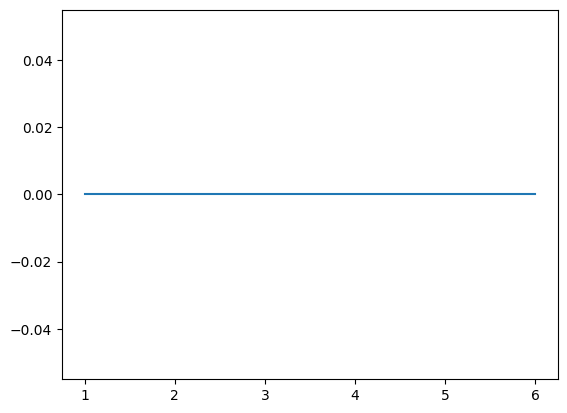

In [54]:
plt.plot(hist[1][:-1], hist[0])